# Regression
[1 Regressioni Lineari](https://blog.quantinsti.com/linear-regression-market-data-python-r/)

## 1) statsmodels

In [4]:
### Import the required libraries

import numpy as np
import pandas as pd

import yfinance as yf
import datetime
import matplotlib.pyplot as plt

## To use statsmodels for linear regression
import statsmodels.formula.api as smf

## To use sklearn for linear regression
from sklearn.linear_model import LinearRegression

In [5]:
####################################################
## Fetch data from yfinance
## 3-year daily data for Coca-Cola, SPY, Pepsi, and USD index

end1 = datetime.date(2021, 7, 28)
start1 = end1 - pd.Timedelta(days = 365 * 3)

ko_df = yf.download("KO", start = start1, end = end1, progress = False)
spy_df = yf.download("SPY", start = start1, end = end1, progress = False)
pep_df = yf.download("PEP", start = start1, end = end1, progress = False)
usdx_df = yf.download("DX-Y.NYB", start = start1, end = end1, progress = False)

####################################################
## Calculate log returns for the period based on Adj Close prices

ko_df['ko'] = np.log(ko_df['Adj Close'] / ko_df['Adj Close'].shift(1))
spy_df['spy'] = np.log(spy_df['Adj Close'] / spy_df['Adj Close'].shift(1))
pep_df['pep'] = np.log(pep_df['Adj Close'] / pep_df['Adj Close'].shift(1))
usdx_df['usdx'] = np.log(usdx_df['Adj Close'] / usdx_df['Adj Close'].shift(1))

####################################################

In [6]:
####################################################
## Create a dataframe with X's (spy, pep, usdx) and Y (ko)

df = pd.concat([spy_df['spy'], ko_df['ko'], 
                pep_df['pep'], usdx_df['usdx']], axis = 1).dropna()

## Save the csv file. Good practice to save data files after initial processing
df.to_csv("Jul2021_data_lin_regression.csv")

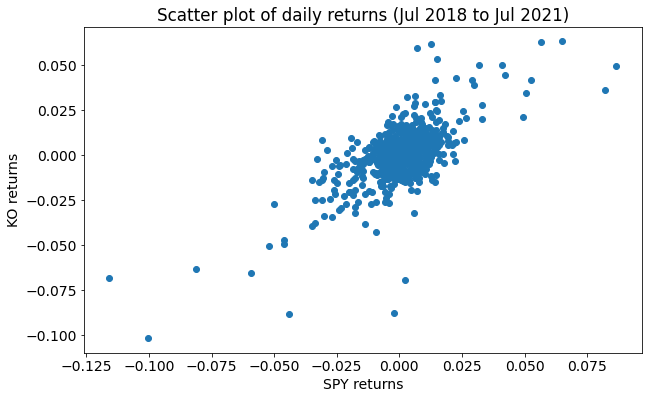

In [7]:
####################################################
## A scatter plot of X (spy) and Y (ko) to examine the nature of their relationship visually

plt.figure(figsize = (10, 6))
plt.rcParams.update({'font.size': 14})
plt.xlabel("SPY returns")
plt.ylabel("KO returns")
plt.title("Scatter plot of daily returns (Jul 2018 to Jul 2021)")
plt.scatter(df['spy'], df['ko'])
plt.show()

####################################################

In [8]:
####################################################
## 1. Calculate correlation between Xs and Y

df.corr()

####################################################

,spy,ko,pep,usdx
spy,1.000000,0.685607,0.727080,-0.038681
ko,0.685607,1.000000,0.739573,-0.097766
pep,0.727080,0.739573,1.000000,-0.005847
usdx,-0.038681,-0.097766,-0.005847,1.000000


In [9]:
####################################################
## 2a. Fit a simple linear regression model to the data using statsmodels 

### Create an instance of the class OLS
slr_sm_model = smf.ols('ko ~ spy', data=df)

### Fit the model (statsmodels calculates beta_0 and beta_1 here)
slr_sm_model_ko = slr_sm_model.fit()

### Summarize the model

print(slr_sm_model_ko.summary()) 

param_slr = slr_sm_model_ko.params

####################################################

                            OLS Regression Results                            
Dep. Variable:                     ko   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     666.1
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          1.19e-105
Time:                        21:12:07   Log-Likelihood:                 2322.5
No. Observations:                 753   AIC:                            -4641.
Df Residuals:                     751   BIC:                            -4632.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.541e-05      0.000     -0.186      0.8

In [10]:
####################################################
### Print the parameter estimates of the simple linear regression model

print("\n")
print("====================================================================")
print("The intercept in the statsmodels regression model is", \
      np.round(param_slr.Intercept, 4))
print("The slope in the statsmodels regression model is", \
      np.round(param_slr.spy, 4))
print("====================================================================")
print("\n")
####################################################



The intercept in the statsmodels regression model is -0.0001
The slope in the statsmodels regression model is 0.7296




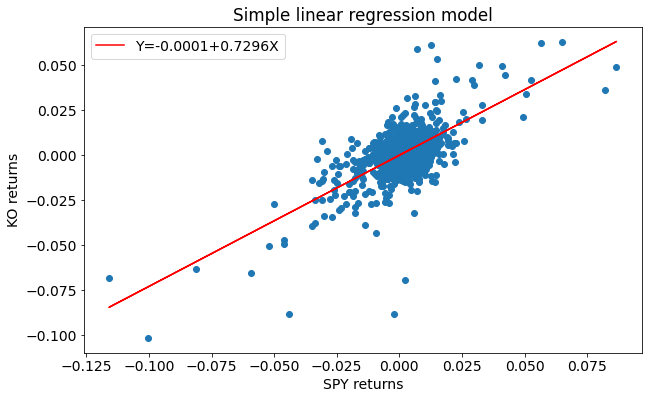

In [11]:
####################################################
## Linear regression plot of X (spy) and Y (ko)
plt.figure(figsize = (10, 6))
plt.rcParams.update({'font.size': 14})
plt.xlabel("SPY returns")
plt.ylabel("KO returns")
plt.title("Simple linear regression model")
plt.scatter(df['spy'],df['ko'])
plt.plot(df['spy'], param_slr.Intercept+param_slr.spy * df['spy'],
         label='Y={:.4f}+{:.4f}X'.format(param_slr.Intercept, param_slr.spy), 
         color='red')
plt.legend()
plt.show()

####################################################

In [12]:
####################################################
### Fit a multiple linear regression model to the data using statsmodels    

### Create an instance of the class OLS
mlr_sm_model = smf.ols('ko ~ spy + pep + usdx', data=df)

### Fit the model (statsmodels calculates beta_0, beta_1, beta_2, beta_3 here)
mlr_sm_model_ko = mlr_sm_model.fit()

### Summarize the model

print(mlr_sm_model_ko.summary())

                            OLS Regression Results                            
Dep. Variable:                     ko   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     374.8
Date:                Wed, 30 Mar 2022   Prob (F-statistic):          1.30e-148
Time:                        21:12:20   Log-Likelihood:                 2428.7
No. Observations:                 753   AIC:                            -4849.
Df Residuals:                     749   BIC:                            -4831.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.198e-05      0.000     -0.261      0.7

In [13]:
####################################################
### Print the parameter estimates of the muliple linear regression model

param_mlr = mlr_sm_model_ko.params

print("\n")
print("====================================================================")
print("The intercept and slopes in the statsmodels regression model are")
print("\n")
print(param_mlr)
print("====================================================================")
print("\n")
####################################################



The intercept and slopes in the statsmodels regression model are


Intercept   -0.000092
spy          0.327410
pep          0.502912
usdx        -0.344074
dtype: float64


